<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
#To prevent the kernel from dying
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
# Import necessary libraries
import torch 
from torch import nn
import matplotlib.pyplot as plt 
import seaborn as sns

torch.__version__

'2.2.1+cu118'

In [67]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [68]:
# Create the data parameters
weight =0.3 
bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(0 , 1 , 0.01).unsqueeze(dim = 1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [69]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

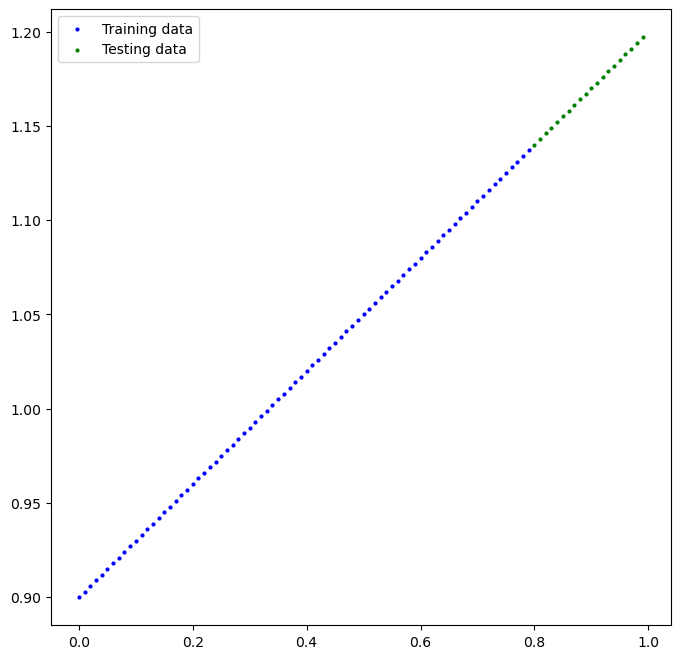

In [70]:
# Plot the training and testing data 
plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train , y_train , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test , y_test , c='g' , s = 4 , label = "Testing data")

#showing the legend 
plt.legend()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [71]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=1 ,  #defining linear layer
                                out_features=1)
    def forward(self , x: torch.Tensor) -> torch.tensor: #forward propagation
        return self.layer1(x)

In [72]:
# Instantiate the model and put it to the target device
model0 = LinearRegressionModel()
model0.state_dict()

OrderedDict([('layer1.weight', tensor([[0.2224]])),
             ('layer1.bias', tensor([-0.1251]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [73]:
next(model0.parameters()).to(device)
model0.to(device)

LinearRegressionModel(
  (layer1): Linear(in_features=1, out_features=1, bias=True)
)

In [74]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model0.parameters() ,  #parameters to optimize
                            lr = 0.01 ) #learning rate

In [75]:
# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model0.train()

  # 1. Forward pass
  y_pred = model0.forward(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred , y_train)
  

  # 3. Zero gradients
  optimizer.zero_grad()
  

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

      # Put model in evaluation mode and setup inference context 
      model0.eval()
      # 1. Forward pass
      y_test_pred = model0(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_test_pred , y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.056 | Test loss: 1.081
Epoch: 20 | Train loss: 0.824 | Test loss: 0.810
Epoch: 40 | Train loss: 0.593 | Test loss: 0.540
Epoch: 60 | Train loss: 0.362 | Test loss: 0.269
Epoch: 80 | Train loss: 0.131 | Test loss: 0.012
Epoch: 100 | Train loss: 0.053 | Test loss: 0.110
Epoch: 120 | Train loss: 0.045 | Test loss: 0.104
Epoch: 140 | Train loss: 0.038 | Test loss: 0.088
Epoch: 160 | Train loss: 0.031 | Test loss: 0.073
Epoch: 180 | Train loss: 0.025 | Test loss: 0.057
Epoch: 200 | Train loss: 0.018 | Test loss: 0.041
Epoch: 220 | Train loss: 0.011 | Test loss: 0.025
Epoch: 240 | Train loss: 0.004 | Test loss: 0.009
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


In [76]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('layer1.weight', tensor([[0.3081]], device='cuda:0')),
             ('layer1.bias', tensor([0.9007], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [77]:
# Make predictions with the model
model0.eval()

with torch.inference_mode():
    y_preds = model0(X_test)
y_preds = y_preds.cpu()

In [79]:
# Send data to target device
X_train = X_train.to("cpu")
X_test = X_test.to("cpu")
y_train = y_train.to("cpu")
y_test = y_test.to("cpu")

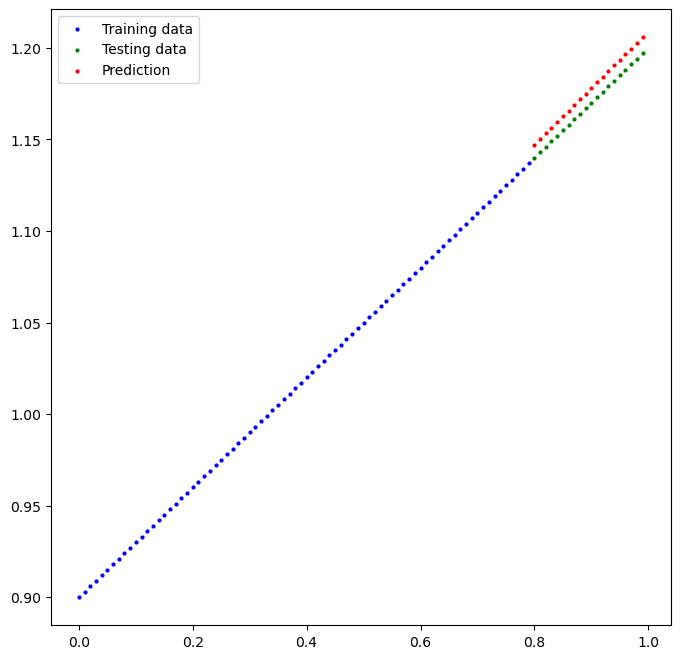

In [80]:
# Plot the predictions (these may need to be on a specific device)
plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train, y_train , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test, y_test , c='g' , s = 4 , label = "Testing data")

#plotting the predictions in red 
plt.scatter(X_test , y_preds , c='r' , s= 4 , label = "Prediction")

#showing the legend 
plt.legend()

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory 


# 2. Create model save path 

# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
